In [1]:
%matplotlib inline
import numpy as np
from figures import single_time_point_decoding_vs_binary_weight_matrix as fig_1
from figures import single_time_point_decoding_vs_nary_weight_matrix as fig_2
from figures import single_time_point_decoding_vs_nary_weights_fixed_g_d as fig_2_1
from figures import single_time_point_decoding_vs_nary_weights_fixed_g_d_varied_match as fig_2_2
from figures import spontaneous_vs_driven_dkl as fig_3

How is stimulus decodability affected when the network's connectivity mirrors the external stimulus transitions? To ask this,  first imagine that activation-dependent hyperexcitability has been switched off by some global mechanism such as neuromodulation. Indeed, early working memory studies showed that stimulus-repetition-dependent hyperexcitability could be gated by task-relevant variables ([Miller et al., 1994][Miller1994]). Further since hyperexcitability shifts a decoder readout towards previous stimuli, it would make sense to turn this off in order to read out current stimuli.

Next imagine a Markovian stimulus that transitions among a discrete set of states over time according to the probability $P(S_t = s_i|S_{t-1} = s_j)$, with one state corresponding to each ensemble. The network's activation $A_t$ is determined by both the previous activation and the incoming stimulus according to $P(A_t = i|A_{t-1}, S_t)$. That is, both the network and the stimulus transition through parallel sets of states, with the stimulus partially influencing the network's transitions, as in the figure below:

<img src="files/images/network_and_stimulus_transitions_unmatched.png" width="300px"/>

Now imagine a decoder that at each time step simply chooses the stimulus corresponding to the active ensemble (e.g., if ensemble 84 was active, the readout of the decoder is *stimulus 84*). How is the decoding accuracy (the probability that the decoder is correct, averaged over time) affected when the network transitions mirror the stimulus transitions, as in the diagram below?

<img src="files/images/network_and_stimulus_transitions_matched.png" width="300px"/>

At a given time step, there are two cases to consider. On the one hand, if the last active ensemble *matched* the last stimulus, decoding should improve. This is because downstream ensembles receiving increased input from the last active ensemble will tend to line up with likely stimuli, since the connectivity mirrors the stimulus transitions. On the other hand, if the last active ensemble *did not match* the last stimulus, decoding should worsen. This is because the downstream ensembles receiving increased input will have little to do with the current stimulus, thereby shifting activation probability mass on average away from the ensemble corresponding to the correct stimulus.

[Miller1994]: http://science.sciencemag.org/content/263/5146/520

Below we consider 5 different connectivity structures, relative to the stimulus transition probabilities: (1) connectivity matched to the stimulus transitions, (2) zero connectivity, (3) connectivity half-matched to the stimulus transitions and half zero, (4) random connectivity, and (5) full connectivity. To choose a stimulus transition matrix that is easily matchable by a connectivity matrix, we build the connectivity matrix $W_{matched}$ first, and then calculate the corresponding transition probabilities using the softmax function to $P(S_t|S_{t-1})$.

In [2]:
CONFIG = {
    'SEED': 0,  # FOR RANDOM NUMBER GENERATOR
    
    'N_NODES': 100,  # NUMBER OF NODES
    'P_CONNECT': .2,  # ERDOS-RENYI CONNECTION PROBABILITY
    
    'G_W': 5,  # GAIN ON PROJECTION WEIGHTS (ALL W_IJ ARE 1 OR 0)
    'G_DS': np.linspace(0, 10, 20, endpoint=True),  # GAINS ON STIMULUS DRIVE
    'G_D_EXAMPLE': 4,  # STIMULUS DRIVE GAIN FOR EXAMPLE DECODING
    'N_TIME_POINTS': 3000,  # NUMBER OF TIME POINTS TO DECODE
    'N_TIME_POINTS_EXAMPLE': 300,
    
    'DECODING_SEQUENCE_LENGTHS': [1, 2],
    
    'FIG_SIZE': (15, 8),
    'COLORS': ['k', 'b', 'g', 'r', 'c'],
    'FONT_SIZE': 16,
}

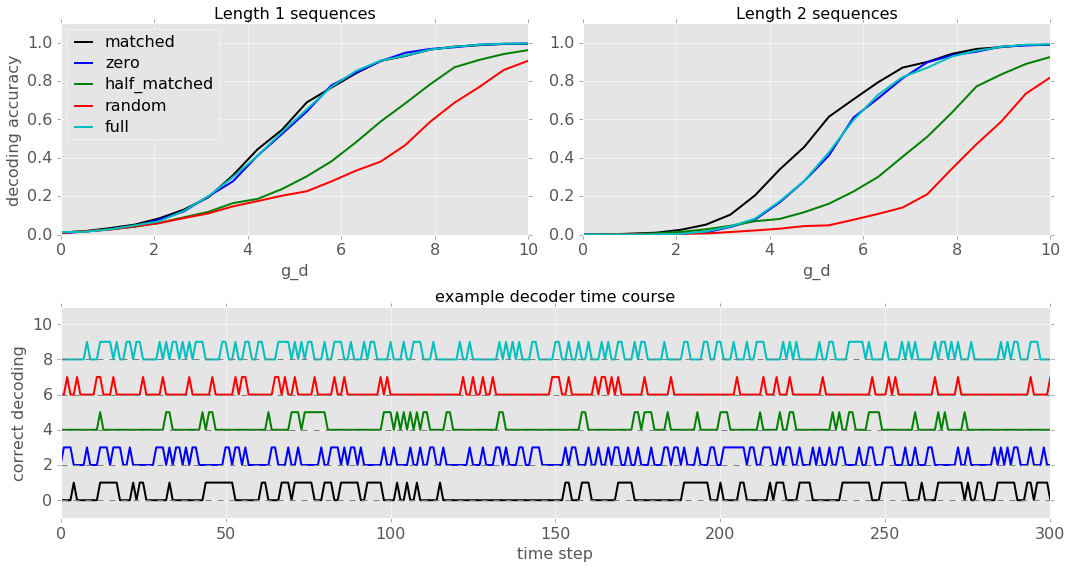

In [3]:
fig_1(**CONFIG)

#### Figure 1: Stimulus decodability depends on the relationship between the network connectivity and the stimulus transition probabilities

Interestingly, we see that whereas decoding accuracy is significantly impaired when the connectivity is random or only half matches the stimulus transitions, the accuracy is equal for zero connectivity, full connectivity, and connectivity precisely matched to the stimulus transitions. Thus, the effects of the two possible cases described above (which improve and worsen stimulus decodability, respectively) seem to exactly cancel out in our model.

In [4]:
CONFIG = {
    'SEED': 0,  # FOR RANDOM NUMBER GENERATOR
    
    'N_NODES': 100,  # NUMBER OF NODES
    'P_CONNECT': .2,  # ERDOS-RENYI CONNECTION PROBABILITY
    'STRENGTHS': [1, 2, 3, 4],  # POSSIBLE CONNECTION STRENGHTS
    'P_STRENGTHS': [.25, .25, .25, .25],  # PROBABILITY OF SELECTING EACH CONNECTION STRENGTH
    
    'G_W': 3,  # GAIN ON PROJECTION WEIGHTS (ALL W_IJ ARE 1 OR 0)
    'G_DS': np.linspace(0, 10, 20, endpoint=True),  # GAINS ON STIMULUS DRIVE
    'G_D_EXAMPLE': 5,  # STIMULUS DRIVE GAIN FOR EXAMPLE DECODING
    'N_TIME_POINTS': 3000,  # NUMBER OF TIME POINTS TO DECODE
    'N_TIME_POINTS_EXAMPLE': 300,
    
    'DECODING_SEQUENCE_LENGTHS': [1, 2, 3],
    
    'FIG_SIZE': (15, 12),
    'COLORS': ['k', 'b', 'g', 'r', 'c'],
    'FONT_SIZE': 16,
}

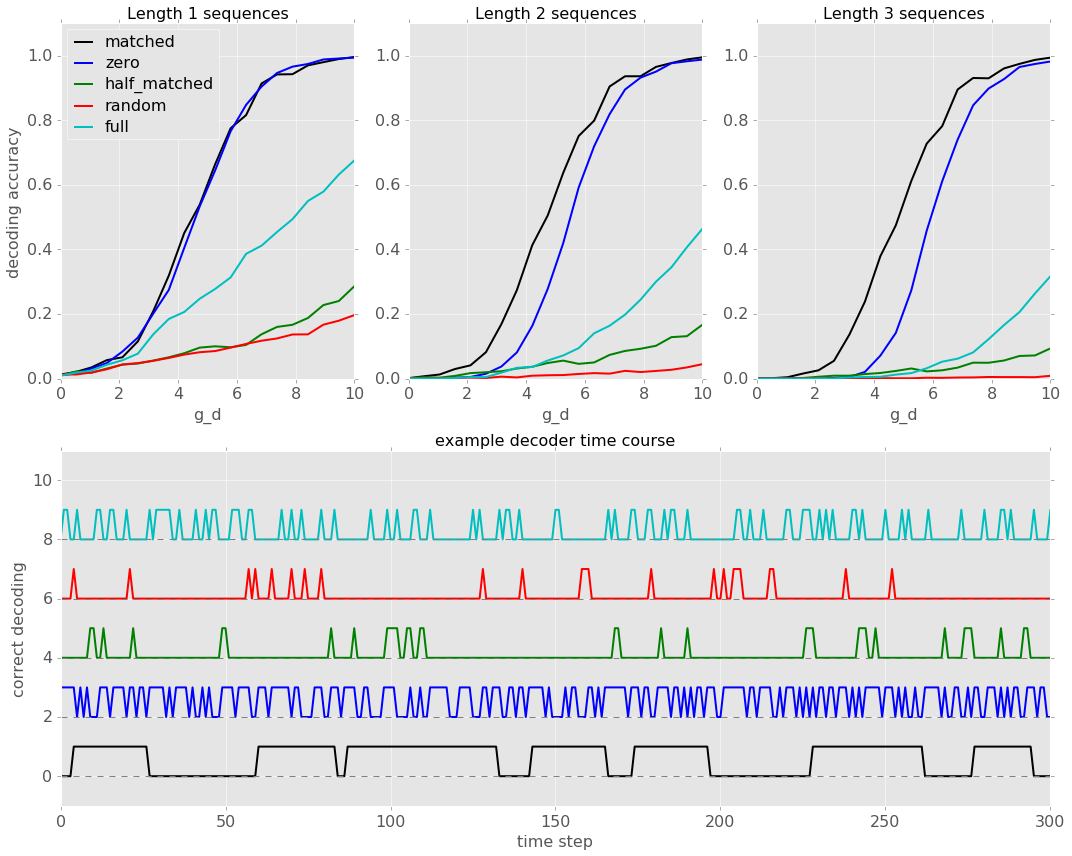

In [5]:
fig_2(**CONFIG)

#### Figure 2: Same as Figure 1 but for non-binary weight matrix
Once again, we see that when when the weight matrix matches the stimulus probability transitions, we get the same decodability as when there are no connections. However, when we try to decode sequences of length > 1, we matched network significantly outperforms the zero-weight network.

In [2]:
CONFIG = {
    'SEED': 0,  # FOR RANDOM NUMBER GENERATOR
    
    'N_NODES': 100,  # NUMBER OF NODES
    'P_CONNECT': .2,  # ERDOS-RENYI CONNECTION PROBABILITY
    'STRENGTHS': [1, 1.25, 1.5, 1.75, 2],  # POSSIBLE CONNECTION STRENGHTS
    'P_STRENGTHS': [.2, .2, .2, .2, .2],  #[.5, .5],  # PROBABILITY OF SELECTING EACH CONNECTION STRENGTH
    
    'G_W': 5,  # GAIN ON PROJECTION WEIGHTS (ALL W_IJ ARE 1 OR 0)
    'G_D': 5,  # STIMULUS DRIVE GAIN FOR DECODING
    'N_TIME_POINTS': 3000,  # 00,  # NUMBER OF TIME POINTS TO DECODE
    'N_TRIALS': 50,
    'N_TIME_POINTS_EXAMPLE': 300,
    
    'DECODING_SEQUENCE_LENGTHS': [1, 3],
    
    'FIG_SIZE': (15, 20),
    'COLORS': ['b', 'g', 'r', 'c'],
    'FONT_SIZE': 24,
}

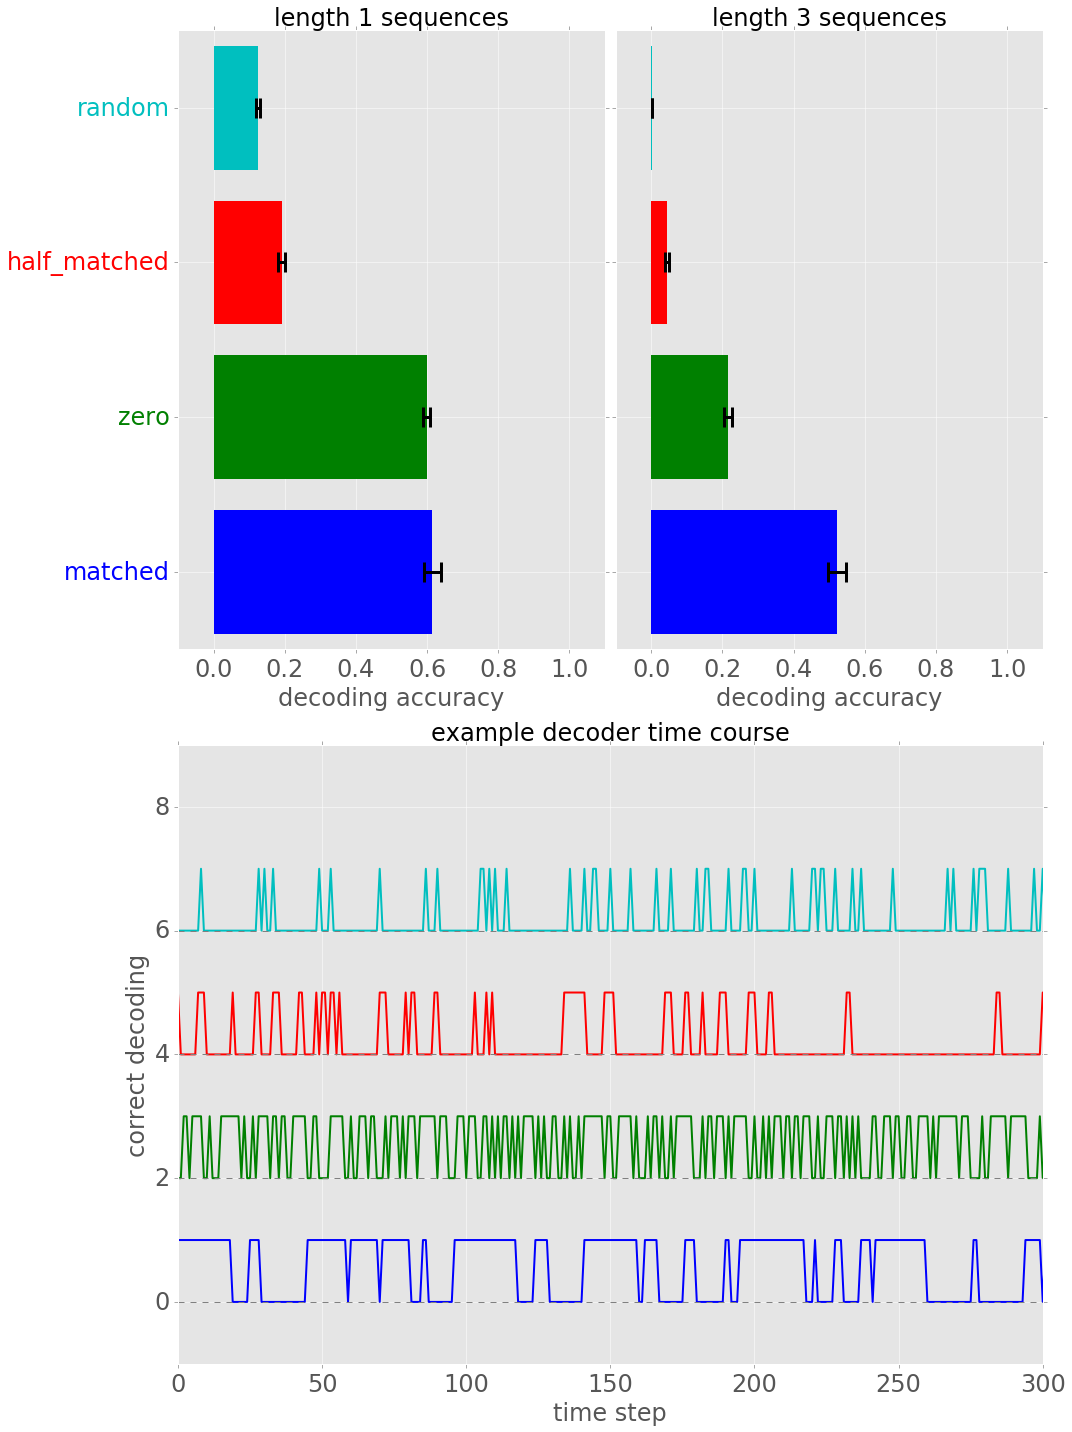

In [3]:
fig_2_1(**CONFIG)

#### Figure 2.1 Multiple trials for specific stimulus and weight gain
This shows that the matched network has higher variability in its decoding accuracy, but it is still significantly better than the zero-weight network.

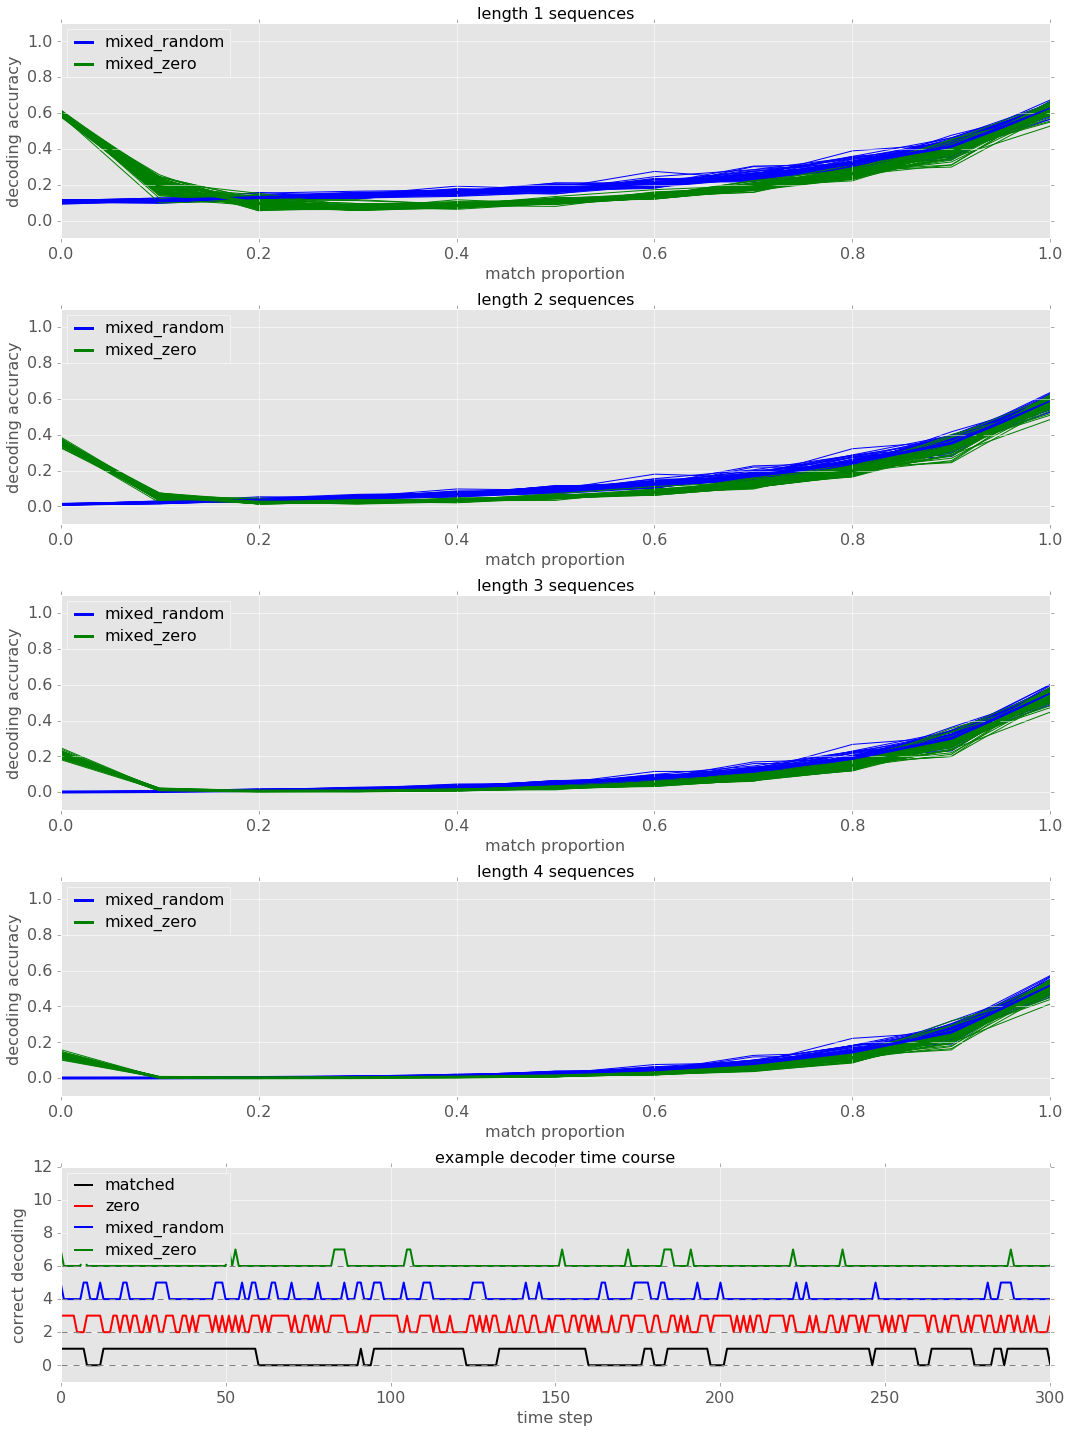

In [2]:
fig_2_2(
    SEED=0,
    
    N_NODES=100,
    P_CONNECT=0.2,
    STRENGTHS=[1, 2],
    P_STRENGTHS=[0.5, 0.5],
    
    G_W=5,
    G_D=5,
    
    MATCH_PROPORTIONS=np.arange(0, 1.1, .1),
    MATCH_PROPORTION_EXAMPLE_IDX=5,
    
    N_TIME_POINTS=3000,
    N_TRIALS=50,
    N_TIME_POINTS_EXAMPLE=300,
    
    DECODING_SEQUENCE_LENGTHS=[1, 2, 3, 4],
    
    COLORS=['b', 'g'],
    COLOR_MATCHED='k',
    COLOR_ZERO='r',
    FIG_SIZE=(15, 20),
    FONT_SIZE=16,
)

### Mathematical underpinnings

Given our model, what can we determine analytically?

First we can easily show that the posterior distribution over a stimulus pattern given a spontaneous activation pattern is equal to the prior:

$$P(S_{t:t+n}|A_{t:t+n}, g_s=0) = \cfrac{P(A_{t:t+n}|S_{t:t+n}, g_s=0)P(S_{t:t+n}, g_s=0)}{P(A_{t:t+n}|g_s=0)}$$

$$ = \cfrac{P(A_{t:t+n}|g_s=0)P(S_{t:t+n})}{P(A_{t:t+n}|g_s=0)} = P(S_{t:t+n}).$$

Of course, this has to be the case, since when $g_s = 0$, the activation pattern contains zero information about the stimulus.

We next calculate $P(A_{t:t+n}|S_{t:t+n})$, i.e., the probability of an activation sequence from times $t$ to $t+n$ given a stimulus sequence from times $t$ to $t+n$. We have:

$$P(A_{t:t+n}|S_{t:t+n}) = P(A_t|S_t)P(A_{t+1}|A_t, S_{t+1})P(A_{t+2}|A_{t+1}, S_{t+2})...$$

since an activation pattern $A_{t'}$ at time $t'$ depends only on the previous activation pattern $A_{t'-1}$ and the current stimulus $S_{t'}$. Since $P(A_{t+1}|A_t, S_{t+1})$ is given, we need to focus primarily on $P(A_t|S_t)$. To calculate this, we expand over possible activations at the previous timestep.

$$P(A_t|S_t) = \sum \limits_{A_{t-1}}P(A_t|A_{t-1}, S_t)P(A_{t-1}|S_t).$$

By considering previous stimuli we then expand the last term as:

$$P(A_{t-1}|S_t) = \sum \limits_{S_{t-1}} P(A_{t-1}|S_{t-1})P(S_{t-1}|S_t).$$

Therefore

$$P(A_t|S_t) = \sum \limits_{A_{t-1}}P(A_t|A_{t-1}, S_t)\sum \limits_{S_{t-1}} P(A_{t-1}|S_{t-1})P(S_{t-1}|S_t).$$

Assuming stationarity implies that:

$$P(A_t = a_i|S_t = s_j) = P(A_{t-1} = a_i|S_{t-1} = s_j).$$

To keep track of which distributions are which, let us rewrite

$$\gamma_{ij} = P(A_{t'} = a_i|S_{t'} = s_j),$$

$$\alpha_{ijk} = P(A_{t'} = a_i|S_{t'} = s_j, A_{t-1} = a_k),$$

and

$$\omega_{mj} = P(S_{t'-1} = s_m|S_{t'} = s_j).$$

for all $t'$. Our equation then boils down to:

$$\gamma_{ij} = \sum \limits_k \alpha_{ijk} \sum \limits_m \gamma_{km}\omega_{mj}.$$

Importantly, $\alpha_{ijk}$ is given, and $\omega_{mj}$ can be calculated directly from the stimulus transition matrix using Bayes' law. What remains is for us to find $\gamma_{ij} = P(A_t = a_i|S_t = s_j)$.

We can do this by rewriting $\mathbf{\gamma^*} = (\gamma_{11}, \gamma_{21}, \dots, \gamma_{N1}, \gamma_{12}, \dots, \gamma_{N2}, \dots, \gamma_{1N}, \dots, \gamma_{NN})^T$. Then $\mathbf{\gamma^*} = \Delta^* \mathbf{\gamma^*}$ is the eigenvector of $\Delta^*$ with eigenvalue $1$, with $\Delta^*_{i'j'}$ given in terms of $\alpha$ and $\omega$. Specifically, if $\Delta_{ijkl} = \alpha_{ijl}\omega_{kj} = P(A_{t'} = a_i|S_{t'} = s_j, A_{t'-1} = a_l)P(S_{t'-1} = s_k|S_{t'} = s_j)$, then

$$\Delta^* = \begin{bmatrix} 
\Delta_{111:} & \Delta_{112:} & \dots & \Delta_{11N:} \\ 
\Delta_{211:} & \Delta_{212:} & \dots & \Delta_{21N:} \\
\vdots & \vdots & \ddots & \vdots \\
\Delta_{N11:} & \Delta_{N12:} & \dots & \Delta_{N1N:} \\
\Delta_{121:} & \Delta_{122:} & \dots & \Delta_{12N:} \\ 
\Delta_{221:} & \Delta_{222:} & \dots & \Delta_{22N:} \\
\vdots & \vdots & \ddots & \vdots \\
\Delta_{N21:} & \Delta_{N22:} & \dots & \Delta_{N2N:} \\
\vdots & \vdots & \ddots & \vdots \\
\Delta_{1N1:} & \Delta_{1N2:} & \dots & \Delta_{1NN:} \\ 
\Delta_{2N1:} & \Delta_{2N2:} & \dots & \Delta_{2NN:} \\
\vdots & \vdots & \ddots & \vdots \\
\Delta_{NN1:} & \Delta_{NN2:} & \dots & \Delta_{NNN:} \\
\end{bmatrix}$$

where each $\Delta_{ijk:}$ is a row vector of length $N$, such that $\Delta^*$ is an $N^2 \times N^2$ matrix.

### Correct sequence decoding probability

What we would like is to determine the probability of the network correctly following a sequence. That is, what is $P(A_{t:t+n} = S_{t:t+n})$? To solve this, we must consider all possible stimulus sequences:

$$P(A_{t:n} = S_{t:t+n}) = \sum \limits_{v_{t:t+n}} P(A_{t:t+n} = v_{t:t+n}|S_{t:t+n} = v_{t:t+n})P(S_{t:t+n} = v_{t:t+n}).$$

The last term $P(S_{t:t+n} = v_{t:t+n})$ is known, and the first term is given by 

$$P(A_{t:t+n} = v_{t:t+n}|S_{t:t+n} = v_{t:t+n}) = 
P(A_t = v_t|S_t = v_t)\prod \limits_{i=1}^n P(A_{t+i} = v_{t+i}|A_{t+i-1} = v_{t+i-1}, S_{t+i} = v_{t+i}).$$

Once again, the only thing that is not immediately known is $P(A_t = v_t|S_t = v_t)$. This value of this quantity for each $v_t$, however, is given simply by the diagonal of $\gamma$, assuming the correspondence $a_i = s_i = v_i$.

#### The zero connectivity case

When the network has zero connectivity, the calculation is straightforward since there is no dependence on the previous network state:

$$P(A_t = S_t; W_0) = \sum \limits_{i} P(S_t = v_i)P(A_t = v_i|S_t = v_i; W_0)
= \sum \limits_{i} P(S_t = v_i)\cfrac{\exp(g_s\delta_{ii})}{\sum \limits_{i'} \exp(g_s \delta_{i'i})}$$

#### Equal single-time-point decoding accuracy for the zero and matched networks

To show that $P(A_t = S_t; W_{matched})$ for the matched case equals $P(A_t = S_t; W_0)$ for the zero case, which our results suggest might be true, we therefore need to show that

$$P(A_t = S_t; W_{matched}) = \sum \limits_{i} P(S_t = v_i)P(A_t = v_i|S_t = v_i; W_{matched}) = \sum \limits_{i} P(S_t = v_i)\cfrac{\exp(g_s\delta_{ii})}{\sum \limits_{i'} \exp(g_s \delta_{i'i})}$$

A sufficient condition for the above to be true is that

$$P(A_t = v_i|S_t = v_i; W_{matched}) = P(A_t = v_i|S_t = v_i; W_0) = \cfrac{\exp(g_s\delta_{ii})}{\sum \limits_{i'} \exp(g_s \delta_{i'i})}.$$

However, a thought experiment shows that this is not true. Consider, for example, a network of 10 nodes, in which nodes 1-9 have extremely strong all-to-all directed connections amongst one another, but in which node 10 receives no connections at all, so that the probability of the network reaching node 10 is arbitrarily small, but nonzero. In this case $P(A_t = v_{10}|S_t = v_{10}; W_0)$ will be greater than 1/10, since the probability only depends on the stimulus and not on the previous network state. However, with $W_{matched}$, we have to consider the previous network state, which will almost surely be one of nodes 1-9, since node 10 is so rarely reachable. Unfortunately, this means that the input node 10 receives when the stimulus is actually $S_t = v_{10}$ is still negligible compared to the inputs received by all the other nodes, and thus $P(A_t = v_{10}|S_t = v_{10}; W_{matched}) < 1/10$.

Thus, the stronger constraint necessarily does not hold and we instead must simply show that the weighted sums are equal, i.e., if we let

$$\eta^i = P(S_t = v_i) \\
\beta^i_0 = P(A_t = v_i|S_t = v_i; W_0) \\
\beta^i_{matched} = P(A_t = v_i|S_t = v_i; W_{matched})$$

we need to show that $\eta^T\beta_0 = \eta^T\beta_{matched}$ instead of simply $\beta_0 = \beta_{matched}$.

One thing of note is that $\beta_0 = \cfrac{\exp(g_s)}{N - 1 + \exp(g_s)}\mathbf{1}$, so $\eta^T\beta_0 = \cfrac{\exp(g_s)}{N - 1 + \exp(g_s)}$.

Thus, we need to show that $\eta^T\beta_{matched} = \eta^T\gamma_{matched}^{diag} = \cfrac{\exp(g_s)}{N - 1 + \exp(g_s)}$.

By studying the spontaneous activity and natural-scene-driven activity in the ferret visual cortex, [Berkes et al. (2011)][Berkes2011] made the observation that over the course of development, the distributions of spontaneous vs. natural-scene-driven activity became more similar to one another, which suggested that the brain was learning a "model" of the external environment, which it could then access even when external stimuli were not present.

Below, we show that in our model, the similarity between spontaneous activity distribution and stimulus-driven activity distribution is minimized when the spontaneous distribution matches the stimulus distribution (see diagram below). Obviously, because of how we have constructed our "matched" model, the spontaneous activity distribution will be statistically equal to the stimulus-driven activity distribution when the stimulus is strong enough to force activation to follow it exactly. This is because in the latter case the driven activation distribution will be exactly equal to the stimulus distribution, which is by construction equal to the spontaneous activation distribution. What we focus on is the alternative case in which the stimulus is not strong enough to force activation to follow it exactly, i.e., in which activation depends on both the current stimulus and the previous activation state.

<img src="files/images/spontaneous_vs_driven_activity_diagram.png" width="600px"/>

To do this we calculate the DKL between the spontaneous activity distribution and the sampled stimulus-driven activity distribution, for both time-averaged state probabilities as well as time-averaged state-transition probabilities.

In doing so we show that when the spontaneous activity distribution exactly matches the stimulus distribution, it also exactly matches the stimulus-driven activity distribution, regardless of the strength of the driving stimulus. Further, we show a that the network with stimulus-matched weights will only show a lower DKL(spontaneous activity, stimulus-driven activity) than the network with random weights in the regime where the influence of the stimulus is larger ($g_d$) than the influence of the previous network state ($g_w$).

[Berkes2011]: http://science.sciencemag.org/content/331/6013/83.abstract?sid=b92e7a61-01c8-4d7f-9061-eabae96868ab

In [8]:
CONFIG = {
    'SEED': 0,  # FOR RANDOM NUMBER GENERATOR
    
    'N_NODES': 100,  # NUMBER OF NODES
    'P_CONNECT': .2,  # ERDOS-RENYI CONNECTION PROBABILITY
    'STRENGTHS': [1],  # POSSIBLE CONNECTION STRENGTHS
    'P_STRENGTHS': [1],  # PROBABILITY OF SELECTING EACH CONNECTION STRENGTH
    
    'G_W': 5,  # GAIN ON PROJECTION WEIGHTS (ALL W_IJ ARE 1 OR 0)
    'G_DS': np.linspace(0, 10, 20, endpoint=True),  # GAINS ON STIMULUS DRIVE
    'N_TIME_POINTS': 20000,  # NUMBER OF TIME POINTS TO DECODE
    
    'FIG_SIZE': (15, 8),
    'COLORS': ['k', 'b', 'g', 'r', 'c'],
    'FONT_SIZE': 16,
}

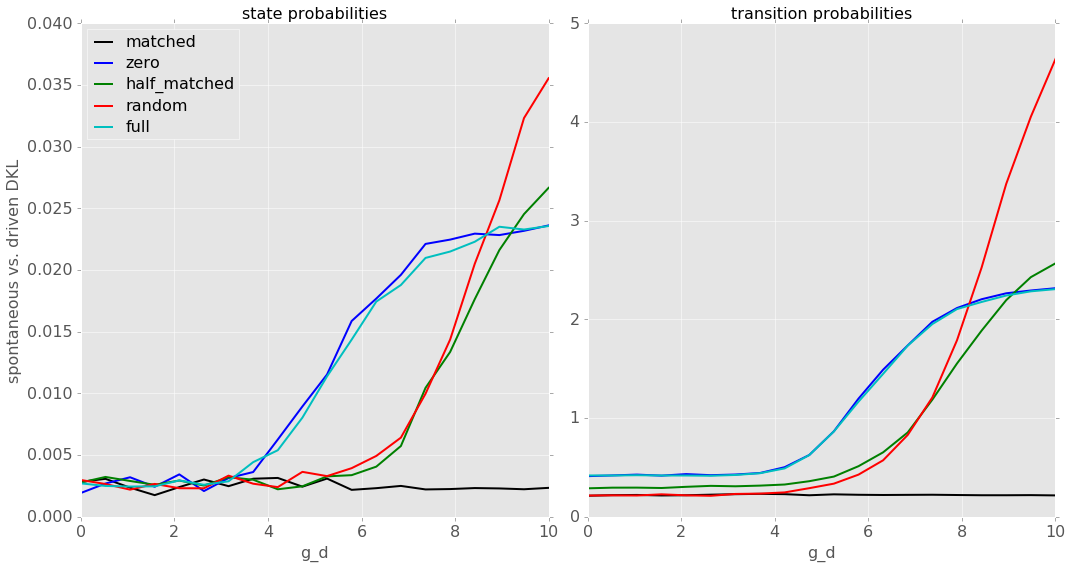

In [9]:
fig_3(**CONFIG)

Can we prove this is the case?

To do so, it is sufficient to show that the spontaneous activity distribution converges to the average activity distribution conditioned on the stimulus. That is, we want to show that

$$P(A_t = a_i|A_{t-1} = a_j, g_s = 0) = P(A_t = a_i|A_{t-1} = a_j, g_s > 0)$$

when 

$$P(S_t = s_i|S_{t-1} = s_j) = \cfrac{\exp(g_wW_{ij})}{\sum \limits_{i'} \exp(g_wW_{i'j})}$$